In [2]:
%pylab inline
from scipy.stats import norm
from scipy import stats
from numpy import linspace
from pylab import plot,show,hist,figure,title
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Build simple histogram of values

20 bins, alpha of 0.75

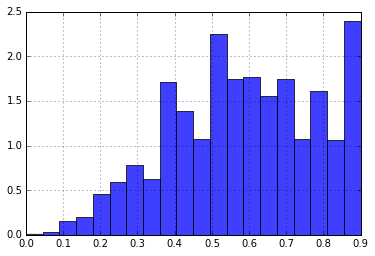

In [3]:
df = pd.read_csv("all_rf_vals.csv", header=None)
df.columns = ['a', 'b', 'c', 'd']
l = list(df['d'])
n, bins, patches = plt.hist(l, 20, normed=1, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()

----
## Make another histogram, fit to normal

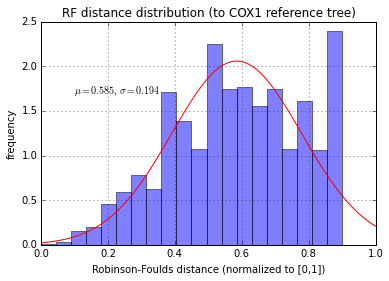

In [4]:
param = norm.fit(l)
x = linspace(0,1,100) # linear space to hold normal dist over range of possible RF values
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])

title('RF distance distribution (to COX1 reference tree)')
text(0.1,1.7, r'$\mu=0.585,\ \sigma=0.194$')
grid()
xlabel('Robinson-Foulds distance (normalized to [0,1])')
ylabel('frequency')
plot(x, pdf_fitted, 'r-')
hist(l, normed=1,alpha=0.5, bins=20)
savefig('fig2.png', bbox_inches='tight')
show()

### Test goodness of fit using Kolmogorov-Smirnov distance

In [5]:
stats.kstest(l, 'norm', N=5000)

(0.56145970943910295, 0.0)

_p_-value of 0 indicates significance (i.e., distribution is normal).

### Use Welch's t-test

In [6]:
s1 = l
s2 = [0.9, 0.9, 0.9, 0.9]

print stats.ttest_ind(s1, s2, equal_var=False)

(-114.92537496177097, 0.0)


Again, a _p_-value of 0 indicates that the two samples (venom and non-venom) are substantially different. In the context of this study (and holding our other assumptions are true), this demonstrates that venoms are are not evolutionarily conserved in the same manner as other peptides, or there is at least something else influencing their selection.

----

## Fit mixture model

In [7]:
import mixture

data = mixture.DataSet()
data.fromList(l)

n1 = mixture.NormalDistribution(.5,.2)
n2 = mixture.NormalDistribution(.6,.2)
n3 = mixture.NormalDistribution(.7,.2)
n4 = mixture.NormalDistribution(.8,.2)
n5 = mixture.NormalDistribution(.9,.2)

m = mixture.MixtureModel(5,
                        [0.2, 0.2, 0.2, 0.2, 0.2],
                        [n1,  n2,  n3,  n4,  n5 ],
                        )

m.EM(data, 100, 0.01)
print m

Parsing data set...done
Step 1: log likelihood: 324.204169355   (diff=325.204169355)
Step 2: log likelihood: 1170.25223736   (diff=846.048068009)
Step 3: log likelihood: 1192.62869569   (diff=22.3764583231)
Step 4: log likelihood: 1211.98444583   (diff=19.3557501415)
Step 5: log likelihood: 1232.66810202   (diff=20.6836561887)
Step 6: log likelihood: 1247.57543987   (diff=14.9073378565)
Step 7: log likelihood: 1257.81978805   (diff=10.2443481734)
Step 8: log likelihood: 1265.17363966   (diff=7.35385161401)
Step 9: log likelihood: 1270.64460906   (diff=5.47096940208)
Step 10: log likelihood: 1274.86165312   (diff=4.2170440522)
Step 11: log likelihood: 1278.19461501   (diff=3.33296189191)
Step 12: log likelihood: 1280.87319665   (diff=2.67858164252)
Step 13: log likelihood: 1283.05474521   (diff=2.1815485643)
Step 14: log likelihood: 1284.85581551   (diff=1.80107029583)
Step 15: log likelihood: 1286.36624099   (diff=1.51042548428)
Step 16: log likelihood: 1287.65618088   (diff=1.28993988

In [8]:
[ m.components[x].__str__().split(':  ')[1].split('\n')[0] for x in range(0,5) ]

['[0.769444751466, 0.1]',
 '[0.564284885974, 0.1]',
 '[0.483220658218, 0.146212605803]',
 '[0.769446855025, 0.1]',
 '[0.397788035948, 0.136193314069]']

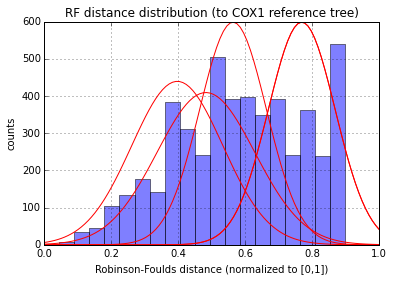

In [9]:
#param = norm.fit(l)
x = linspace(0,1,100) # linear space to hold normal dist over range of possible RF values
#pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])

f1 = norm.pdf(x, 0.769444751466, 0.1)
f2 = norm.pdf(x, 0.564284885974, 0.1)
f3 = norm.pdf(x, 0.483220658218, 0.146212605803)
f4 = norm.pdf(x, 0.769446855025, 0.1)
f5 = norm.pdf(x, 0.397788035948, 0.136193314069)

#f1 = norm.pdf(x, 0.769444751466, 0.15806124)
#f2 = norm.pdf(x, 0.564284885974, 0.18238628)
#f3 = norm.pdf(x, 0.483220658218, 0.18435359)
#f4 = norm.pdf(x, 0.769446855025, 0.22142591)
#f5 = norm.pdf(x, 0.397788035948, 0.25377299)

fig, ax1 = plt.subplots()
title('RF distance distribution (to COX1 reference tree)')
grid()
xlabel('Robinson-Foulds distance (normalized to [0,1])')
ylabel('counts')


n, bins, patches = ax1.hist(l, normed=False,alpha=0.5, bins=20)

ax2 = ax1.twinx()
ax2.plot(x, f1, 'r-',
     x, f2, 'r-',
     x, f3, 'r-',
     x, f4, 'r-',
     x, f5, 'r-')



ax2.get_yaxis().set_ticks([])
savefig('fig2.png', bbox_inches='tight')
plt.show()

In [10]:
#print ax1.get_yaxis().get_ticklabels()[1].get_text()

n

array([   1.,    8.,   34.,   46.,  104.,  133.,  176.,  141.,  384.,
        311.,  241.,  505.,  393.,  397.,  350.,  393.,  241.,  363.,
        239.,  540.])

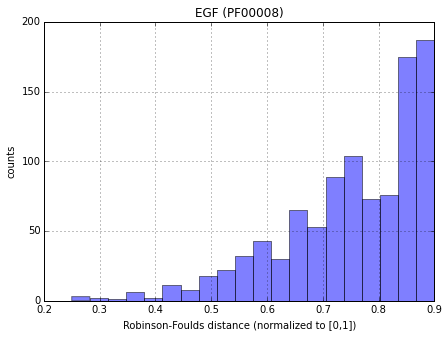

Mean:     0.75468
Std. dev: 0.12464759765
Survival function: 0.121838200395


In [48]:
def makehist(filename, name):
    df = pd.read_csv(filename, header=None)
    df.columns = ['a', 'b', 'c', 'd']
    l = list(df['d'])
    fig, ax1 = plt.subplots(figsize=(7,5))
    #title('RF distance distribution (to COX1 reference tree)')
    title(name)
    grid()
    xlabel('Robinson-Foulds distance (normalized to [0,1])')
    ylabel('counts')
    n, bins, patches = ax1.hist(l, normed=False,alpha=0.5, bins=20)
    plt.show()
    
    param = norm.fit(l)
    x = linspace(0,1,100)
    pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])
    print "Mean:     {0}\nStd. dev: {1}".format(param[0], param[1])
    print "Survival function: {0}".format(norm.sf(0.9, loc=param[0], scale=param[1]))
    
    
makehist("distances/pf00008.csv", "EGF (PF00008)")

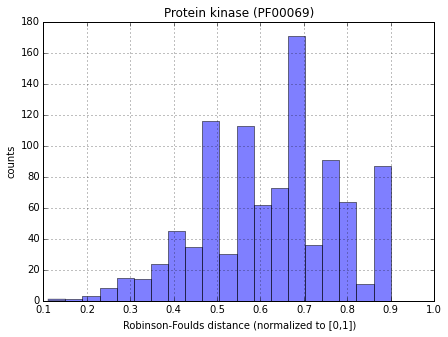

Mean:     0.625576
Std. dev: 0.154128512041
Survival function: 0.0374980477765


In [52]:
makehist("distances/pf00069.csv", "Protein kinase (PF00069)")

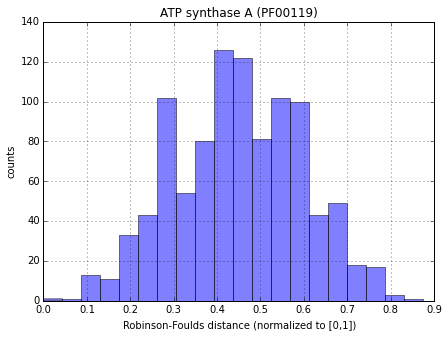

Mean:     0.448295
Std. dev: 0.147979457949
Survival function: 0.00113477730295


In [49]:
makehist("distances/pf00119.csv", "ATP synthase A (PF00119)")

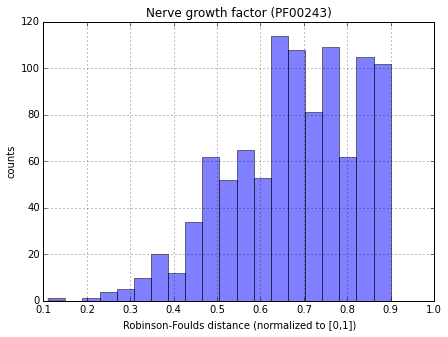

Mean:     0.675795
Std. dev: 0.147352363317
Survival function: 0.0640600763103


In [50]:
makehist("distances/pf00243.csv", "Nerve growth factor (PF00243)")

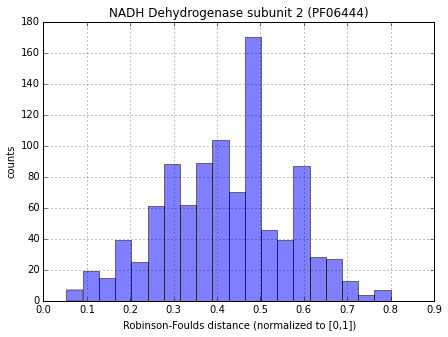

Mean:     0.420374
Std. dev: 0.143070262892
Survival function: 0.000400598695608


In [51]:
makehist("distances/pf06444.csv", "NADH Dehydrogenase subunit 2 (PF06444)")